# Label side

In [1]:
import numpy as np
from jesse import helpers, research

_, candles = research.get_candles(
    "Binance Perpetual Futures",
    "BTC-USDT",
    "1m",
    helpers.date_to_timestamp("2022-07-01"),
    helpers.date_to_timestamp("2025-11-15"),
    warmup_candles_num=0,
    caching=False,
    is_for_jesse=False,
)

candles.shape

/opt/homebrew/Caskroom/miniforge/base/envs/jesse/lib/python3.12/site-packages/jesse/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


(1775520, 6)

In [2]:
from src.bars.fusion.demo_v2 import DemoV2Bar

bar_container = DemoV2Bar(max_bars=-1)
bar_container.update_with_candles(candles)
merged_bar = bar_container.get_fusion_bars()
merged_bar.shape

PyTorch configured: device=cpu, dtype=torch.float32


(17974, 6)

In [3]:
from jesse import utils

df_plot_bar = utils.numpy_candles_to_dataframe(
    merged_bar, name_date="time"
)
df_plot_bar.head(1)

time     open    close     high      low  \
2022-07-01 00:06:00 2022-07-01 00:06:00  19795.5  19753.4  19848.0  19649.5   

                        volume  
2022-07-01 00:06:00  14792.991

In [ ]:
from lightweight_charts import Chart

chart = Chart()
# chart = Chart(inner_width=1, inner_height=0.8)
# chart2 = chart.create_subchart(position="bottom", width=1, height=0.2, sync=True)

chart.set(df_plot_bar[["time", "open", "high", "low", "close", "volume"]])

# line = chart2.create_line(name="zigzag", style="dotted")
# line.set(df_plot_bar[["time", "zigzag"]])

chart.show(block=True)

In [4]:
from research.labeler.gmm_labeler import GMMLabeler

labeler_L4 = GMMLabeler(merged_bar, 4)
labeler_L4.plot_label_on_candles()

[I 2025-11-22 22:33:28,849] A new study created in memory with name: no-name-cf3fabbd-9fb2-4d5f-b879-fd8efbdd8c2c
[I 2025-11-22 22:33:31,401] Trial 0 finished with value: 29.9566573973191 and parameters: {'random_state': 896}. Best is trial 0 with value: 29.9566573973191.
[I 2025-11-22 22:33:33,600] Trial 1 finished with value: 3.390498536053764 and parameters: {'random_state': 738}. Best is trial 0 with value: 29.9566573973191.
[I 2025-11-22 22:33:34,955] Trial 2 finished with value: 44.27641078415222 and parameters: {'random_state': 902}. Best is trial 2 with value: 44.27641078415222.
[I 2025-11-22 22:33:36,298] Trial 3 finished with value: 42.54163907414253 and parameters: {'random_state': 801}. Best is trial 2 with value: 44.27641078415222.
[I 2025-11-22 22:33:38,239] Trial 4 finished with value: 42.47187132113234 and parameters: {'random_state': 2}. Best is trial 2 with value: 44.27641078415222.
[I 2025-11-22 22:33:40,626] Trial 5 finished with value: 3.3578175350437207 and parame

In [5]:
from research.labeler.gmm_labeler_v2 import GMMLabelerV2

labeler_L4 = GMMLabelerV2(merged_bar, 4)
labeler_L4.plot_label_on_candles()

Fitting GMMHMM with Custom Candles strategy...
Features: ['hl_diff', 'ret_lag', 'ret_1', 'fwd_ret_lag']


         1  -96562.51869530             +nan
         2  -95094.85592917   +1467.66276613
         3  -94276.43150805    +818.42442112
         4  -93790.09329666    +486.33821139
         5  -93546.41108547    +243.68221119
         6  -93424.45391911    +121.95716636
         7  -93354.44532004     +70.00859907
         8  -93320.49940157     +33.94591846
         9  -93303.30112996     +17.19827162
        10  -93294.30293392      +8.99819603
        11  -93289.52009391      +4.78284002
        12  -93286.91990063      +2.60019328
        13  -93285.46385766      +1.45604297
        14  -93284.61847737      +0.84538029
        15  -93284.10699203      +0.51148535
        16  -93283.78375703      +0.32323500
        17  -93283.57063974      +0.21311728
        18  -93283.42466071      +0.14597904
        19  -93283.32142310      +0.10323761
        20  -93283.24655121      +0.07487189
        21  -93283.19121436      +0.05533685
        22  -93283.14975057      +0.04146379
        23

State 0 Avg Ret: -0.197671%
State 1 Avg Ret: 0.254385%
Buy State: 1


state 1 (8195) return: 2084.681665%
state 0 (9771) return: -1931.443721%


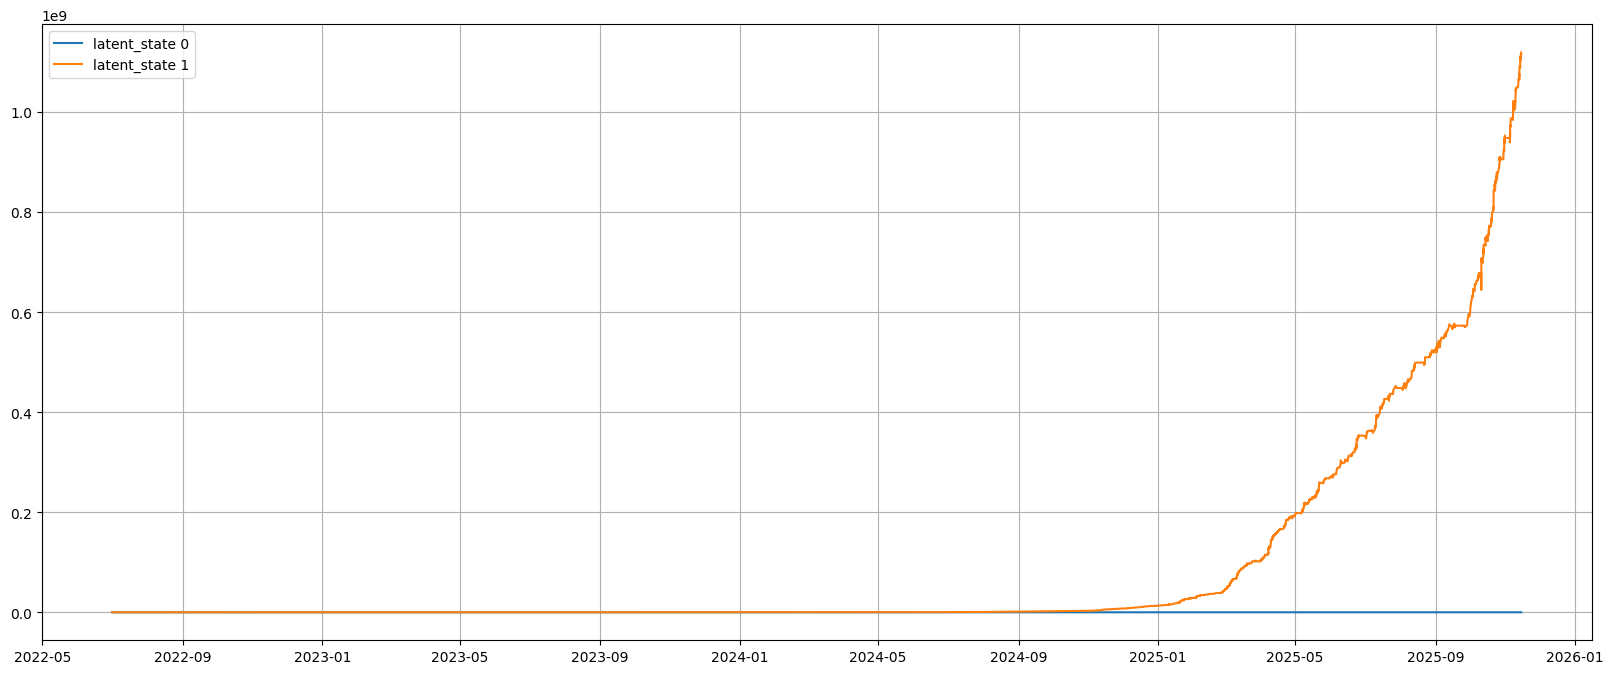

In [6]:
labeler_L4.plot_label_returns()

In [ ]:
from research.labeler.gmm_labeler import GMMLabeler

labeler_L5 = GMMLabeler(merged_bar, 5)
labeler_L5.plot_label_on_candles()

In [ ]:
# labeler_L5.plot_label_returns()

In [ ]:
labeler_L6 = GMMLabeler(merged_bar, 6)
labeler_L6.plot_label_on_candles()

In [ ]:
labeler_L7 = GMMLabeler(merged_bar, 7)
labeler_L7.plot_label_on_candles()

In [ ]:
for labeler, idx in zip([labeler_L4, labeler_L5, labeler_L6, labeler_L7], [4, 5, 6, 7]):
    label_hard = labeler.label_hard_state
    print(f"{label_hard.shape = }")
    np.save(f"data/raw_label_hard_L{idx}.npy", label_hard)
    label_direction_force = labeler.label_direction_force
    print(f"{label_direction_force.shape = }")
    np.save(f"data/raw_label_direction_L{idx}.npy", label_direction_force)

# Label meta

In [ ]:
import numpy as np
import pandas as pd
from strategies.BinanceBtcEntropyBarV1.config import SIDE
from strategies.BinanceBtcEntropyBarV1.config import get_side_model

side_model = get_side_model(False)

merged_bar = np.load("data/merged_bar.npy")

df_features = pd.read_parquet("data/features.parquet")

side_res = side_model.predict(df_features[SIDE])

side_pred_label = np.where(side_res > 0.5, 1, -1)
print(side_pred_label.shape)

print(np.unique(side_pred_label, return_counts=True))

In [ ]:
close_prices = merged_bar[:, 2]
len_gap = len(close_prices) - len(side_pred_label)
close_prices = close_prices[len_gap - 1 : -1]

assert len(close_prices) == len(side_pred_label)

In [ ]:
meta_label = np.zeros(len(side_pred_label))

TRADE_FEE = 0.05 / 100

start_idx = 0
cumsum_ret = 0
start_price = 0
for idx, (i, p) in enumerate(zip(side_pred_label, close_prices)):
    if i == 1 or i == -1:
        if idx == 0:
            # 开始持仓
            start_idx = idx
            start_price = p
            cumsum_ret -= TRADE_FEE
        elif side_pred_label[idx - 1] != i:
            # 反向持仓，先结算收益
            cumsum_ret -= TRADE_FEE
            cumsum_ret += np.log(p / start_price) * side_pred_label[idx - 1]
            if cumsum_ret > 0:
                meta_label[start_idx:idx] = 1
            cumsum_ret = 0
            start_price = p
            start_idx = idx
            cumsum_ret -= TRADE_FEE
        else:
            # 继续持仓
            continue
    else:
        raise ValueError(f"side_pred_label[{idx}] = {i} is not valid")
else:
    last_price = merged_bar[-1, 2]
    # 结算最后一根bar的持仓, 可能还没有结算，所以先不加trade fee
    if i == side_pred_label[idx - 1]:
        # 已经开仓，结算
        cumsum_ret += np.log(last_price / start_price) * side_pred_label[idx - 1]
        if cumsum_ret > 0:
            meta_label[start_idx:] = 1
    else:
        # 反向开仓
        cumsum_ret -= TRADE_FEE
        cumsum_ret += np.log(last_price / start_price) * side_pred_label[idx - 1]
        if cumsum_ret > 0:
            meta_label[start_idx:] = 1


print(np.unique(meta_label, return_counts=True))

In [ ]:
np.save("data/label_meta.npy", meta_label)